In [1]:
from random_walk_engine import TDAgent
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### Visualize improvement of value estimation across the episodes

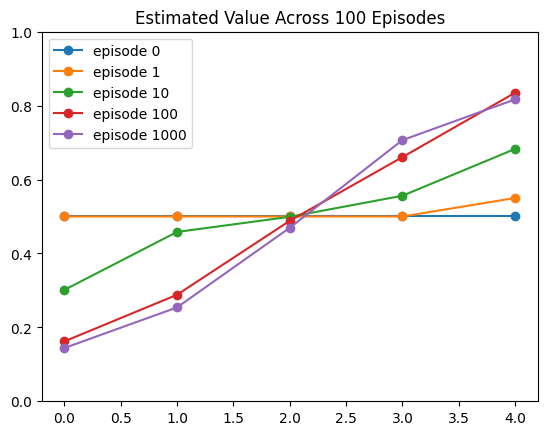

In [2]:
num_states = 7    # including left & right terminal states, ODD NUMBER
alpha = 0.1
gamma = 1
num_episode = 1000

td_agent = TDAgent(num_states, alpha, gamma, num_episode)
td_agent.run()

state_values_history = td_agent.state_values_history

# plot
episodes_to_plot = [0, 1, 10, 100, 1000]
for i in range(0, state_values_history.shape[0]):
    if i in episodes_to_plot:
        plt.plot(state_values_history[i], "-o", label="episode "+str(i))
plt.legend()
plt.title("Estimated Value Across 100 Episodes")
plt.ylim((0, 1))
plt.show()

#### Visualize the effect of alpha on RMS error during learning

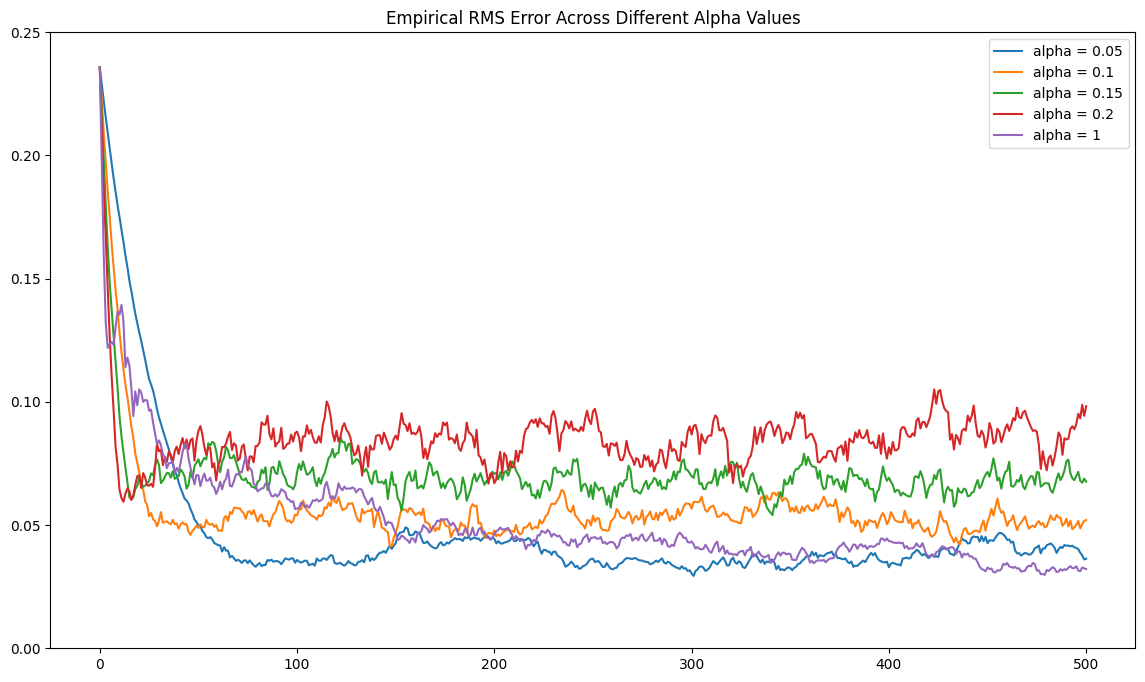

In [9]:
num_states = 7    # including left & right terminal states, ODD NUMBER
alphas = [0.05, 0.1, 0.15, 0.2, 1]
gamma = 1
num_episode = 500

num_trials = 20

plt.figure(figsize=(14, 8))

for alpha in alphas:
    
    rms_errors_arr = np.zeros((num_trials, num_episode+1))
    
    for trial in range(1, num_trials+1):
        
        if alpha == 1:
            td_agent = TDAgent(num_states, alpha, gamma, num_episode, variable_alpha=True)
            td_agent.run()
        else:
            td_agent = TDAgent(num_states, alpha, gamma, num_episode)
            td_agent.run()

        rms_errors = td_agent.rms_errors_history
        rms_errors_arr[trial-1] = rms_errors

    # compute average across trials and plot
    ave_rms_error = np.mean(rms_errors_arr, axis=0)
    plt.plot(ave_rms_error, label="alpha = "+str(alpha))
            
                   
plt.legend()
plt.title("Empirical RMS Error Across Different Alpha Values")
plt.ylim((0, 0.25))
plt.show()